In [13]:
import skgeom as sg
from skgeom.draw import draw

import matplotlib.pyplot as plt

def draw_skeleton(polygon, skeleton, show_time=False):
    draw(polygon)

    for h in skeleton.halfedges:
        if h.is_bisector:
            p1 = h.vertex.point
            p2 = h.opposite.vertex.point
            plt.plot([p1.x(), p2.x()], [p1.y(), p2.y()], 'r-', lw=2)
            
    if show_time:
        for v in skeleton.vertices:
            plt.gcf().gca().add_artist(plt.Circle(
                (v.point.x(), v.point.y()),
                v.time, color='blue', fill=False))

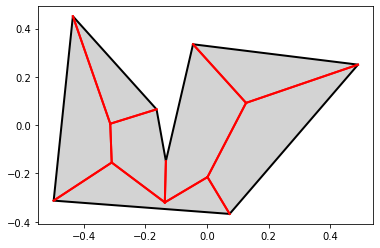

In [14]:
poly = sg.random_polygon(seed=1)
skel = sg.skeleton.create_interior_straight_skeleton(poly)
draw_skeleton(poly, skel)

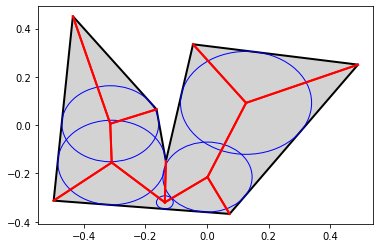

In [15]:
draw_skeleton(poly, skel, show_time=True)

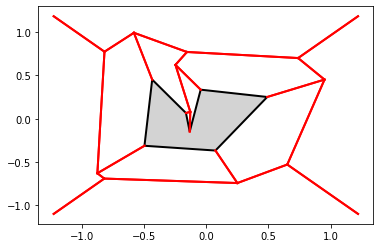

In [16]:
skel = sg.skeleton.create_exterior_straight_skeleton(poly, 0.1)
draw_skeleton(poly, skel)

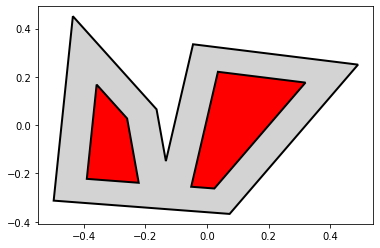

In [17]:
skel = sg.skeleton.create_interior_straight_skeleton(poly)
draw(poly)
for offset_poly in skel.offset_polygons(0.1):
    draw(offset_poly, facecolor="red")

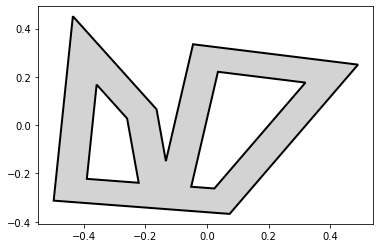

In [18]:
from skgeom import boolean_set
import functools

poly_with_holes = functools.reduce(
    lambda a, b: boolean_set.difference(a, b)[0], skel.offset_polygons(0.1), poly)
draw(poly_with_holes)

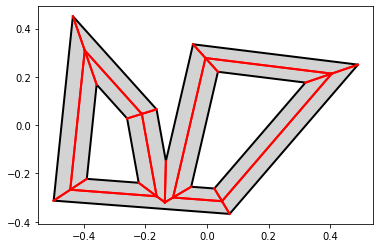

In [19]:
draw_skeleton(poly_with_holes, sg.skeleton.create_interior_straight_skeleton(poly_with_holes))